**Banks need to determine whether a loan applicant is likely to repay the loan.**

Incorrect approvals → higher default risk. Incorrect rejections → lost business.

**Goal**: Analyze applicant attributes to identify key factors influencing loan approval.

STEP 1 — Setup & Load Data

In [3]:
import pandas as pd
import numpy as np

# Load dataset (first upload CSV to Colab)
df = pd.read_csv('/content/train.csv')

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


STEP 2 — Keeping Only Useful Columns

In [4]:
df = df[['Gender','Married','Education','ApplicantIncome','CoapplicantIncome',
         'LoanAmount','Credit_History','Loan_Status']]

STEP 3 — Handle Missing Values

In [6]:
# Handle missing numeric values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Handle missing categorical values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

STEP 4 — Encode Categorical Data

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in ['Gender','Married','Education','Loan_Status']:
    df[col] = encoder.fit_transform(df[col])

STEP 5 — Exploratory Data Analysis (5 Plots)

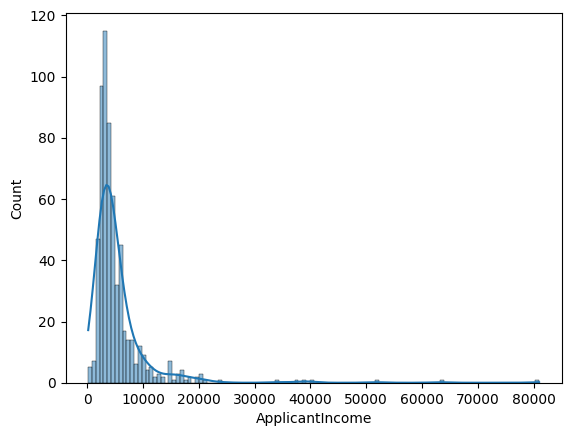

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Income Distribution
sns.histplot(df['ApplicantIncome'], kde=True)
plt.show()


**Plot 1: Income Distribution**

Applicant incomes vary widely with a right-skewed distribution.
A small portion of applicants earn significantly more than the median, indicating income alone is not a stable signal.


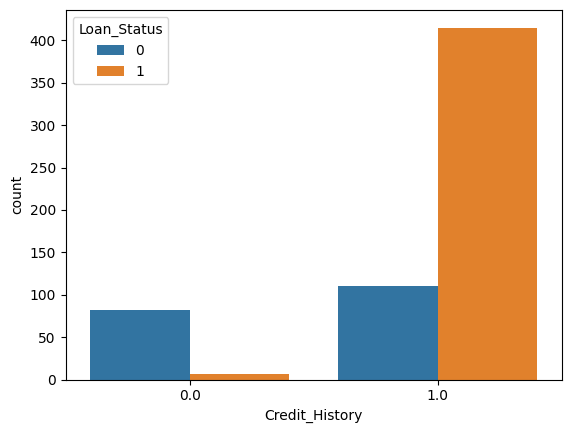

In [10]:
# 2. Loan Status vs Credit History
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.show()


**Plot 2: Loan Status vs Credit History**

Applicants with a valid credit history are much more likely to be approved (≈4x+).
Repayment reliability is prioritized over income during loan allocation.


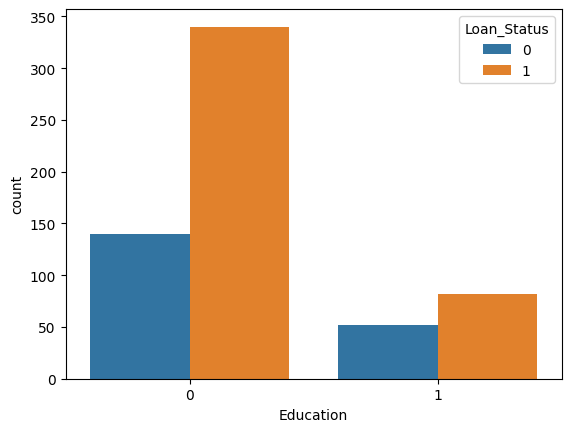

In [11]:
# 3. Loan Status vs Education
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

**Plot 3: Loan Status vs Education**

Graduates have a slightly higher approval rate than non-graduates,
but the effect is secondary compared to credit history.


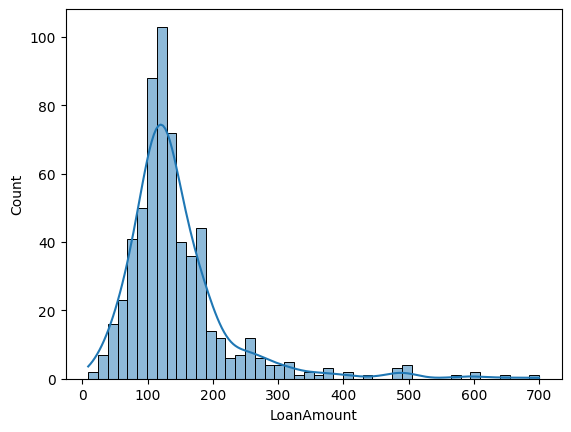

In [12]:
# 4. Loan Amount Distribution
sns.histplot(df['LoanAmount'], kde=True)
plt.show()

**Plot 4: Loan Amount Distribution**

Loan amounts are moderately skewed, with most loans issued in the mid-range.


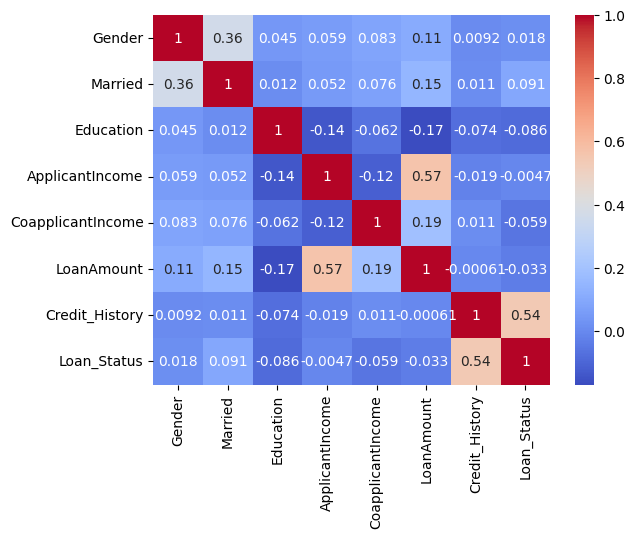

In [13]:
# 5. Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Plot 5: Correlation Heatmap**

Credit History shows the strongest correlation with approval decisions. Other variables show weaker effects.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7837837837837838

Confusion Matrix:
 [[ 27  38]
 [  2 118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



The logistic regression model achieved a reasonable accuracy.
More importantly, the model is interpretable, allowing us to understand how each factor influences the approval decision.

**Key takeaway:**
Credit History contributes the strongest positive weight toward loan approval.
Income variables have smaller influence, confirming that repayment reliability is prioritized over earnings.


The model works because it aligns with how banks actually make decisions —
they optimize for minimizing default risk, not maximizing loan volume.


**Conclusion:**
Loan approval decisions are strongly influenced by the applicant's credit history.
Income affects approval probability, but only after repayment reliability is established.
The logistic regression model is appropriate here because it is interpretable,
which is essential in financial decision-making environments that require transparency.


**STEP 7 — Interpretation**



*   Credit History is the dominant factor in loan approval decisions.
*   Higher income alone does not guarantee approval — repayment reliability > raw earnings.
*   Logistic Regression chosen for interpretability, aligning with banking decision transparency needs.
*   Insights support risk reduction and more consistent approval policy criteria.



